In [1]:
#importing the required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#Exploring the target vaiable
train_label_df=pd.read_csv("train_labels.csv")
train_label_df.head()

,name,invasive
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


1    1448
0     847
Name: invasive, dtype: int64


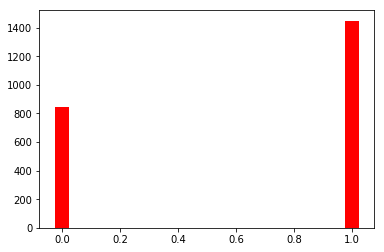

In [3]:
#Exploring the target label and plotting it 
label_df=train_label_df.invasive.value_counts()
print(label_df)
x=[0,1]
y=[label_df[0],label_df[1]]
plt.bar(x, y, 0.05, color='r')
plt.show()


Populating the interactive namespace from numpy and matplotlib
(866, 1154, 3)


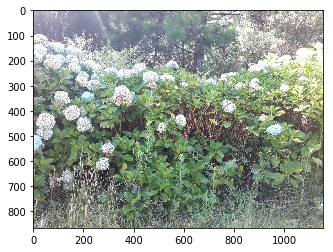

In [4]:
#Exploring a sample image from the data set
%pylab inline
from skimage import io,transform


img_sample = io.imread("/train/3.jpg")
imshow(img_sample)
print(img_sample.shape)

In [5]:
#Splitting the data into training and testing sets
x_train=np.empty(shape=(1500,64,64,3))
y_train=train_label_df.iloc[:1500,1].values
for i in range(1500):
    im=io.imread("/train/"+str(i+1)+'.jpg')
    x_train[i]=transform.resize(im,output_shape=(64,64,3))

x_test=np.empty(shape=(795,64,64,3)) 
y_test=train_label_df.iloc[1500:2295,1].values
for i in range(795):
    im=io.imread("/train/"+str(i+1501)+'.jpg')
    x_test[i]=transform.resize(im,output_shape=(64,64,3))


/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [6]:
#Bulding the actual model
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


#BenchMark
benchMarkModel = Sequential()
benchMarkModel.add(Dense(100, activation='relu',input_shape=(64, 64, 3)))
benchMarkModel.add(Dropout(0.5))
benchMarkModel.add(Flatten())
benchMarkModel.add(Dense(1, activation='sigmoid'))
benchMarkModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



cnn=Sequential()
cnn.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64,3,3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128,3,3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))



cnn.add(Flatten())
cnn.add(Dense(output_dim=100,activation='relu'))
cnn.add(Dropout(p=0.3))
cnn.add(Dense(output_dim=100,activation='relu'))
cnn.add(Dropout(p=0.3))

cnn.add(Dense(output_dim=1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3...)`
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu",

In [7]:
#traing the benchmark model
benchMarkModel.fit(x_train, y_train, epochs=1, batch_size=20)

Epoch 1/1
1500/1500 [==============================] - 2s - loss: 0.6720 - acc: 0.7033     - ETA: 1s - loss: 0.758


In [8]:
#Evaluating the benchmark accuracy
acc = benchMarkModel.evaluate(x_test, y_test)[1]
print("/n")
print('Evaluation accuracy:{0}'.format(round(acc, 4)))

736/795 [==========================>...] - ETA: 0s/n
Evaluation accuracy:0.7019


In [9]:
#training the actual final model
cnn.fit(x_train, y_train, epochs=20, batch_size=20)


Epoch 1/20
1500/1500 [==============================] - 1s - loss: 0.6342 - acc: 0.6393     
Epoch 2/20
1500/1500 [==============================] - 1s - loss: 0.5223 - acc: 0.7347     
Epoch 3/20
1500/1500 [==============================] - 1s - loss: 0.4860 - acc: 0.7727     
Epoch 4/20
1500/1500 [==============================] - 1s - loss: 0.4166 - acc: 0.8087     
Epoch 5/20
1500/1500 [==============================] - 1s - loss: 0.3621 - acc: 0.8453     
Epoch 6/20
1500/1500 [==============================] - 1s - loss: 0.3800 - acc: 0.8400     
Epoch 7/20
1500/1500 [==============================] - 1s - loss: 0.3432 - acc: 0.8620     
Epoch 8/20
1500/1500 [==============================] - 1s - loss: 0.3137 - acc: 0.8713     
Epoch 9/20
1500/1500 [==============================] - 1s - loss: 0.2713 - acc: 0.8940     
Epoch 10/20
1500/1500 [==============================] - ETA: 0s - loss: 0.2461 - acc: 0.897 - 1s - loss: 0.2468 - acc: 0.8980     
Epoch 11/20
1500/1500 [========

In [11]:
#Final model hyper-parameters
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
__________

In [12]:
#Evaluating the actual final model
acc = cnn.evaluate(x_test, y_test)[1]
print("/n")
print('Evaluation accuracy:{0}'.format(round(acc, 4)))

704/795 [=========================>....] - ETA: 0s/n
Evaluation accuracy:0.8679


In [13]:
#Checking how the model has predicted for two different samples
np.round(cnn.predict(x_test[7:9]))

array([[ 0.],
       [ 1.]], dtype=float32)

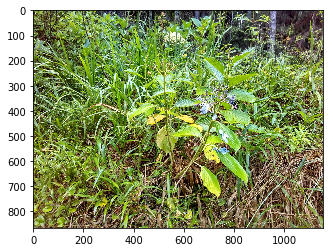

In [14]:
#sample no 1
img_sample1= io.imread("/train/1509.jpg")
imshow(img_sample1)

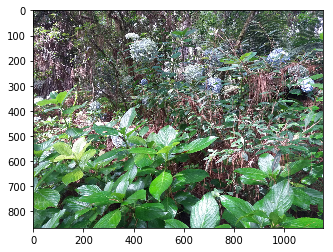

In [15]:
#sample no 2
img_sample2=io.imread("/train/1510.jpg")
imshow(img_sample2)